# https://colab.research.google.com/

# Apprendre à coder en Python pour l'Intelligence Artificielle
## Episode 10 - 2eme projet : Ventes immobilières

<p align="center">
<a href="https://www.youtube.com/watch?v=ymfTklOJyo0" target="_blank" ><img  src="https://raw.githubusercontent.com/anisayari/Youtube-apprendre-python-intelligence-artificielle/master/%2310%20-%202eme%20Projet%20-%20Ventes%20immobili%C3%A8res/cover-serie-10.png" width="800" height="auto"/></a>
</p>



<img  src="https://static.wixstatic.com/media/2ed41a_3711bb0c45384ba1a3bc48895df1bf41~mv2.jpg" width="1000" height="auto"/>




# IMPORT DATA

In [0]:
%time 
import pandas as pd
df0 = pd.read_csv('https://raw.githubusercontent.com/anisayari/Youtube-apprendre-python-intelligence-artificielle/master/%2310%20-%202eme%20Projet%20-%20Ventes%20immobili%C3%A8res/df_marseille_dvf.csv', sep='|')
df0.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.



,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,year
0,1,04/01/2019,Vente en l'état futur d'achèvement,"197000,00",39.0,BD,1213,BLANCARDE,13004.0,MARSEILLE 4EME,13,204,818.0,C,157,72,1,NaN,NaN,NaN,NaN,2019
1,1,04/01/2019,Vente en l'état futur d'achèvement,"197000,00",39.0,BD,1213,BLANCARDE,13004.0,MARSEILLE 4EME,13,204,818.0,C,157,16,1,NaN,NaN,NaN,NaN,2019
2,1,04/01/2019,Vente,"160000,00",36.0,RUE,1054,BENEDIT,13004.0,MARSEILLE 4EME,13,204,817.0,E,47,430,1,2.0,Appartement,65.0,3.0,2019
3,1,04/01/2019,Vente,"112000,00",4.0,RUE,0443,ANTOINE PONS,13004.0,MARSEILLE 4EME,13,204,815.0,L,81,109,2,2.0,Appartement,70.0,3.0,2019
4,1,03/01/2019,Vente,"175000,00",171.0,AV,5989,DU MERLAN,13014.0,MARSEILLE 14EME,13,214,893.0,C,265,138,1,3.0,Dépendance,0.0,0.0,2019


#DATA PREPROCESSING

In [0]:
def preprocessing(df):
    df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
    df['year'] = df['Date mutation'].dt.year
    df['months'] = df['Date mutation'].dt.year
    df['day'] = df['Date mutation'].dt.year
    df = df.drop_duplicates()
    df = df[df['Type local'].isin(['Maison','Appartement'])]
    df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
    df['Valeur fonciere']  = df['Valeur fonciere'].astype(float)
    df = df[df['Valeur fonciere'] < 10000000]
    df = df[df['Nombre pieces principales'] < 21]
    #df['Code postal'] = df['Code postal'].astype(str)

    return df

df = df0.copy()   
df  = preprocessing(df)

In [0]:
df.shape

(73322,)

In [0]:
df.isnull().sum()

No disposition                   0
Date mutation                    0
Nature mutation                  0
Valeur fonciere                322
No voie                       1965
Type de voie                  1134
Code voie                        0
Voie                             0
Code postal                      2
Commune                          0
Code departement                 0
Code commune                     0
Prefixe de section               0
Section                          0
No plan                          0
1er lot                      12093
Nombre de lots                   0
Code type local                  0
Type local                       0
Surface reelle bati             14
Nombre pieces principales       14
year                             0
months                           0
day                              0
dtype: int64

# DATA EXPLORATION & VISUALIATION

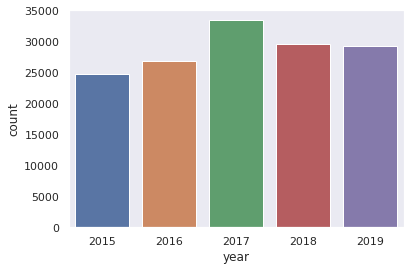

In [0]:
import seaborn as sns
sns.set(style='dark')

sns.countplot(x="year", data=df)

In [0]:
import plotly.express as px

fig = px.box(df, x="year", y="Valeur fonciere", hover_data=['No voie','Voie','Code postal'])
fig.show()

In [0]:
df[df['Voie']=='DES LOUBETS']

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,year,months,day
23851,1,2019-01-18,Vente en l'état futur d'achèvement,"182000,00",NaN,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,312,25,1,NaN,NaN,NaN,NaN,2019,2019,2019
23852,1,2019-01-18,Vente en l'état futur d'achèvement,"182000,00",NaN,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,312,89,1,NaN,NaN,NaN,NaN,2019,2019,2019
24205,1,2019-01-24,Vente en l'état futur d'achèvement,"188000,00",NaN,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,312,30,1,NaN,NaN,NaN,NaN,2019,2019,2019
24206,1,2019-01-24,Vente en l'état futur d'achèvement,"188000,00",NaN,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,312,96,1,NaN,NaN,NaN,NaN,2019,2019,2019
24294,1,2019-02-01,Vente en l'état futur d'achèvement,"182000,00",NaN,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,312,60,1,NaN,NaN,NaN,NaN,2019,2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90681,1,2017-03-29,Vente,"50000,00",31.0,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,482,NaN,0,NaN,NaN,NaN,NaN,2017,2017,2017
94858,1,2017-09-18,Vente,"228000,00",5208.0,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,208,NaN,0,1.0,Maison,45.0,3.0,2017,2017,2017
124715,1,2016-11-29,Vente,"378000000,00",35.0,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,412,NaN,0,1.0,Maison,130.0,5.0,2016,2016,2016
148509,2,2015-07-30,Echange,"100,00",9.0,TSSE,5378,DES LOUBETS,13011.0,MARSEILLE 11EME,13,211,867.0,H,471,NaN,0,NaN,NaN,NaN,NaN,2015,2015,2015


In [0]:
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
df['Valeur fonciere']  = df['Valeur fonciere'].astype(float)

In [0]:
df = df[df['Valeur fonciere'] < 300000000]

In [0]:
import plotly.express as px

fig = px.box(df, x="year", y="Valeur fonciere", hover_data=['No voie','Voie','Code postal'])
fig.show()

In [0]:
df[(df['Voie']=='HENRI BARBUSSE') & (df['Valeur fonciere'] > 30000000)]

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,year,months,day
71638,1,2017-11-30,Vente,35770184.0,1.0,RUE,4407,HENRI BARBUSSE,13001.0,MARSEILLE 1ER,13,201,801.0,E,1,1,1,2.0,Appartement,135.0,5.0,2017,2017,2017
71639,1,2017-11-30,Vente,35770184.0,1.0,RUE,4407,HENRI BARBUSSE,13001.0,MARSEILLE 1ER,13,201,801.0,E,1,8,1,2.0,Appartement,24.0,1.0,2017,2017,2017


In [0]:
df.shape

(140762, 24)

In [0]:
import plotly.express as px

fig = px.box(df, x="year", y="Valeur fonciere", hover_data=['No voie','Voie','Code postal'])
fig.show()

In [0]:
import plotly.express as px

fig = px.box(df, x="year", y="Valeur fonciere", hover_data=['No voie','Voie','Code postal'])
fig.show()

In [0]:
df.describe()

count       73322
unique         17
top       13008.0
freq         7593
Name: Code postal, dtype: object

In [0]:
df['Type local'].value_counts(dropna=False)

Appartement                                 64767
Dépendance                                  35647
NaN                                         24227
Maison                                       8578
Local industriel. commercial ou assimilé     7543
Name: Type local, dtype: int64

In [0]:
#df['Type local'].isnull().sum()

24227

In [0]:
#df['Type local'] = df['Type local'].fillna(0)
#df['Type local'] = df['Type local'].astype(int)

ValueError: ignored

In [0]:
df['Voie'].value_counts()

DU REDON          876
DU PRADO          581
NATIONAL          488
PARADIS           465
ROMAIN ROLLAND    464
                 ... 
LA GIRAUDE          1
MOISE               1
SAINTE HELENE       1
DES ARCADES         1
DES ETOILES         1
Name: Voie, Length: 3357, dtype: int64

In [0]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', '1er lot', 'Nombre de lots', 'Code type local',
       'Type local', 'Surface reelle bati', 'Nombre pieces principales',
       'year', 'months', 'day'],
      dtype='object')

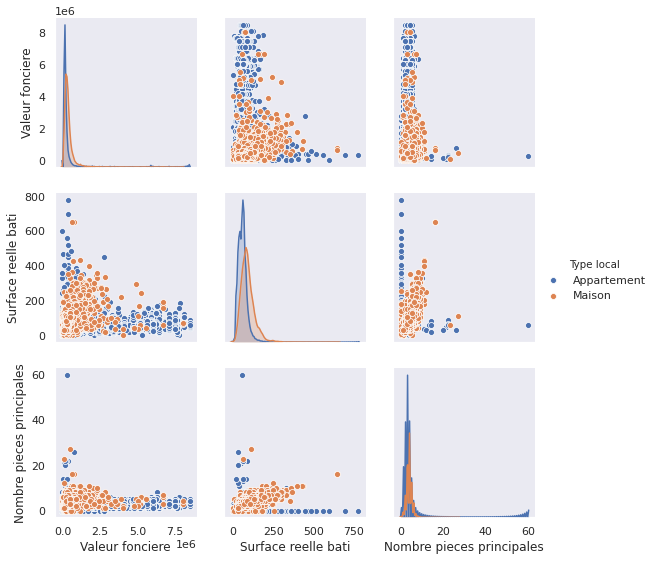

In [0]:
sns.pairplot(df[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Type local']], hue='Type local')

In [0]:
import plotly.express as px
import numpy as np 
df['Valeur fonciere_log'] = df['Valeur fonciere'].apply(np.log)
fig = px.box(df, x="year", y="Valeur fonciere_log", hover_data=['No voie','Voie','Code postal'])
fig.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:193: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:193: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



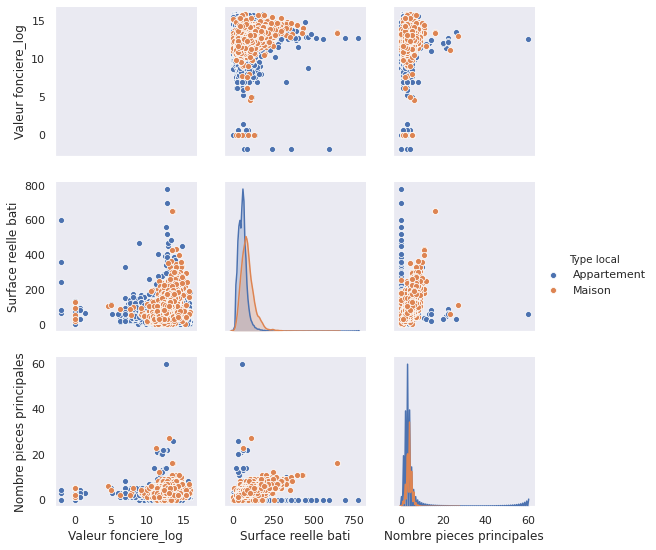

In [0]:
sns.pairplot(df[['Valeur fonciere_log','Surface reelle bati','Nombre pieces principales','Type local']], hue='Type local')

<Figure size 720x720 with 0 Axes>

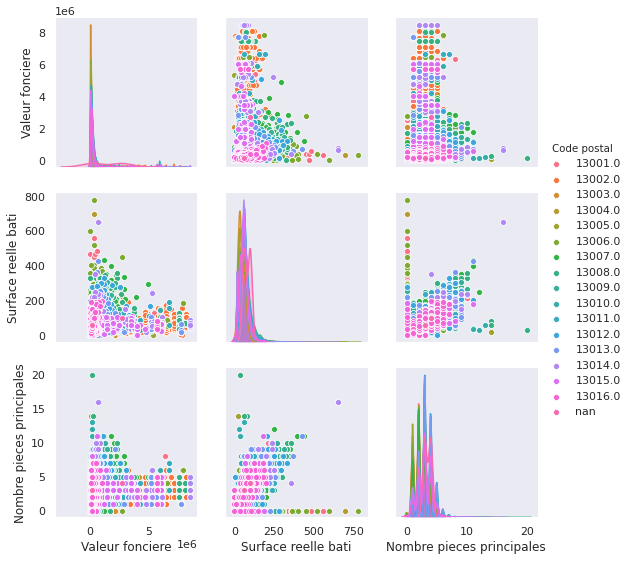

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.pairplot(df[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Code postal']], hue='Code postal')

In [0]:
fig = px.line(df[df['Voie']=="PARADIS"].sort_values('Date mutation'), x="Date mutation", y="Valeur fonciere", title='Evolution du prix Rue PARADIS')
fig.show()

In [0]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', '1er lot', 'Nombre de lots', 'Code type local',
       'Type local', 'Surface reelle bati', 'Nombre pieces principales',
       'year', 'months', 'day'],
      dtype='object')

In [0]:
df['valeur au m2'] = df['Valeur fonciere']/df['Surface reelle bati']

In [0]:
fig = px.line(df[df['Voie']=="PARADIS"].sort_values('Date mutation'), x="Date mutation", y="valeur au m2", title='Evolution du prix Rue PARADIS')
fig.show()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73322 entries, 2 to 151123
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   No disposition             73322 non-null  int64         
 1   Date mutation              73322 non-null  datetime64[ns]
 2   Nature mutation            73322 non-null  object        
 3   Valeur fonciere            73322 non-null  float64       
 4   No voie                    71357 non-null  float64       
 5   Type de voie               72188 non-null  object        
 6   Code voie                  73322 non-null  object        
 7   Voie                       73322 non-null  object        
 8   Code postal                73322 non-null  object        
 9   Commune                    73322 non-null  object        
 10  Code departement           73322 non-null  int64         
 11  Code commune               73322 non-null  int64         
 12  Pre

In [0]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', '1er lot', 'Nombre de lots', 'Code type local',
       'Type local', 'Surface reelle bati', 'Nombre pieces principales',
       'year', 'months', 'day', 'valeur au m2'],
      dtype='object')

In [0]:
df.isnull().sum()

No disposition                   0
Date mutation                    0
Nature mutation                  0
Valeur fonciere                  0
No voie                       1965
Type de voie                  1134
Code voie                        0
Voie                             0
Code postal                      0
Commune                          0
Code departement                 0
Code commune                     0
Prefixe de section               0
Section                          0
No plan                          0
1er lot                      11731
Nombre de lots                   0
Code type local                  0
Type local                       0
Surface reelle bati              0
Nombre pieces principales        0
year                             0
months                           0
day                              0
valeur au m2                     0
dtype: int64

ValueError: ignored

In [0]:
df['Code postal'].value_counts(dropna=True)

13008.0    7593
13009.0    6282
13013.0    5799
13005.0    5580
13006.0    5424
13004.0    5325
13012.0    5311
13010.0    4812
13001.0    4372
13007.0    4236
13015.0    3890
13003.0    3861
13011.0    3708
13014.0    3226
13002.0    2779
13016.0    1122
Name: Code postal, dtype: int64

In [0]:
df = df.dropna()
y = df['Valeur fonciere']
X= df[['Nombre de lots','year','months','day','Nombre pieces principales','Surface reelle bati','Code postal']]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [0]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=0)

In [0]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
print(regr.feature_importances_)

[0.08738312 0.11021534 0.11360899 0.09558674 0.00288285 0.25566018
 0.33466277]


In [0]:
for name, feature in zip(['Nombre de lots','year','months','day','Nombre pieces principales','Surface reelle bati','Code postal'], regr.feature_importances_):
    print(name, round(feature*100,1))

Nombre de lots 8.7
year 11.0
months 11.4
day 9.6
Nombre pieces principales 0.3
Surface reelle bati 25.6
Code postal 33.5


In [0]:
y_pred = regr.predict(X_test)

In [0]:
y_pred

array([229200.56665636, 225068.25344188, 142579.24251825, ...,
       166935.32906865, 297163.67421136, 222738.2544311 ])

array([180000., 248000., 185000., ..., 192000., 145000., 121000.])

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, np.array(y_test.values.tolist()))

237862361279.0054